# TF-IDF (Term Frequency - Inverse Document Frequency)

## 📚 Complete Guide to TF-IDF for Text Vector Representation


---

## Table of Contents
1. What is TF-IDF?
2. Mathematical Foundation
3. Why TF-IDF?
4. Implementation using NLTK and scikit-learn
5. Practical Experiments
6. Real-world Applications

---

## 1. What is TF-IDF?

**TF-IDF** stands for **Term Frequency - Inverse Document Frequency**. It is a numerical statistic that reflects how important a word is to a document in a collection of documents (corpus).

### Key Concepts:

- **Term Frequency (TF)**: How frequently a term appears in a document
- **Inverse Document Frequency (IDF)**: How rare or common a term is across all documents
- **TF-IDF Score**: TF × IDF - Combines both measures to give importance scores

### Why is it useful?
- Converts text into numerical vectors
- Identifies important words in documents
- Reduces the weight of common words (like "the", "is")
- Increases the weight of rare, meaningful words
- Foundation for many NLP tasks (text classification, search engines, document similarity)

## 2. Mathematical Foundation

### Term Frequency (TF)

There are different ways to calculate TF:

1. **Raw Count**: Simply count how many times a term appears
   ```
   TF(t, d) = count of term t in document d
   ```

2. **Frequency**: Divide by total terms in the document
   ```
   TF(t, d) = (count of term t in document d) / (total terms in document d)
   ```

3. **Logarithmic**: Apply log to smooth the values
   ```
   TF(t, d) = 1 + log(count of term t in document d)
   ```

### Inverse Document Frequency (IDF)

Measures how rare or common a term is across all documents:

```
IDF(t) = log(Total number of documents / Number of documents containing term t)
```

Or with smoothing to avoid division by zero:
```
IDF(t) = log((Total number of documents + 1) / (Number of documents containing term t + 1)) + 1
```

### TF-IDF Score

Final score combining both:
```
TF-IDF(t, d) = TF(t, d) × IDF(t)
```

### Example Calculation:

**Corpus:**
- Document 1: "The cat sat on the mat"
- Document 2: "The dog sat on the log"
- Document 3: "Cats and dogs are great"

For the term **"cat"** in Document 1:
- TF = 1/6 = 0.167 (appears once, 6 total words)
- IDF = log(3/1) = 0.477 (3 total docs, appears in 1 doc)
- TF-IDF = 0.167 × 0.477 = 0.080

For the term **"the"** in Document 1:
- TF = 2/6 = 0.333 (appears twice)
- IDF = log(3/2) = 0.176 (appears in 2 docs)
- TF-IDF = 0.333 × 0.176 = 0.059

**Observation:** "cat" gets a higher score than "the" because it's more unique!

## 3. Why TF-IDF over Simple Frequency?

### Problem with Raw Frequency:

If we only count word frequencies:
- Common words like "the", "is", "and" get high scores
- These words don't help distinguish documents
- Important but rare words get low scores

### TF-IDF Solution:

✅ **Balances frequency with rarity**
- High TF-IDF: Word appears frequently in THIS document but rarely in others
- Low TF-IDF: Either rare in this document OR appears in many documents

✅ **Advantages:**
1. Simple and intuitive
2. Fast to compute
3. Works well for many applications
4. Reduces impact of common words
5. No training required (unsupervised)

❌ **Limitations:**
1. Doesn't capture word order or context
2. Treats each word independently
3. Large vocabulary creates high-dimensional sparse vectors
4. Doesn't handle synonyms or semantics

---

## Let's Start Practical Implementation! 🚀

## Experiment 1: Installing and Importing Required Libraries

In [1]:
# Import required libraries
import nltk
import numpy as np
import pandas as pd
from collections import Counter
import math
from sklearn.feature_extraction.text import TfidfVectorizer

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully!")
print(f"NLTK version: {nltk.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

✅ All libraries imported successfully!
NLTK version: 3.8.1
NumPy version: 1.26.4
Pandas version: 2.3.3


### 📊 Observation - Experiment 1:
- Successfully imported all required libraries for TF-IDF implementation
- We're using both NLTK (for text preprocessing) and scikit-learn (for built-in TF-IDF)
- NumPy and Pandas will help with numerical operations and data display
- Matplotlib and Seaborn for visualizations

## Experiment 2: Download Required NLTK Data

In [2]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

print("✅ NLTK data downloaded successfully!")

✅ NLTK data downloaded successfully!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mahes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mahes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 📊 Observation - Experiment 2:
- Downloaded tokenizers (punkt) for splitting text into words
- Downloaded stopwords list for filtering common words
- Downloaded WordNet for lemmatization
- These tools help preprocess text before calculating TF-IDF

## Experiment 3: Manual TF-IDF Implementation from Scratch

Let's build TF-IDF step by step to understand the mathematics!

In [3]:
# Sample corpus of documents
corpus = [
    "The sky is blue and beautiful",
    "Love this blue and beautiful sky",
    "The quick brown fox jumps over the lazy dog",
    "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
    "I love green eggs and ham"
]

print("📄 Our Sample Corpus:")
print("=" * 60)
for i, doc in enumerate(corpus, 1):
    print(f"Document {i}: {doc}")
print("=" * 60)

📄 Our Sample Corpus:
Document 1: The sky is blue and beautiful
Document 2: Love this blue and beautiful sky
Document 3: The quick brown fox jumps over the lazy dog
Document 4: A king's breakfast has sausages, ham, bacon, eggs, toast and beans
Document 5: I love green eggs and ham


In [4]:
# Step 1: Preprocess the documents (tokenize and lowercase)
from nltk.tokenize import word_tokenize

def preprocess(text):
    """Tokenize and lowercase the text"""
    tokens = word_tokenize(text.lower())
    return tokens

# Tokenize all documents
tokenized_corpus = [preprocess(doc) for doc in corpus]

print("🔤 Tokenized Documents:")
print("=" * 60)
for i, tokens in enumerate(tokenized_corpus, 1):
    print(f"Document {i}: {tokens}")
print("=" * 60)

🔤 Tokenized Documents:
Document 1: ['the', 'sky', 'is', 'blue', 'and', 'beautiful']
Document 2: ['love', 'this', 'blue', 'and', 'beautiful', 'sky']
Document 3: ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Document 4: ['a', 'king', "'s", 'breakfast', 'has', 'sausages', ',', 'ham', ',', 'bacon', ',', 'eggs', ',', 'toast', 'and', 'beans']
Document 5: ['i', 'love', 'green', 'eggs', 'and', 'ham']


In [5]:
# Step 2: Calculate Term Frequency (TF) for each document
def calculate_tf(document):
    """Calculate term frequency for a document"""
    tf_dict = {}
    total_terms = len(document)
    term_counts = Counter(document)
    
    for term, count in term_counts.items():
        tf_dict[term] = count / total_terms
    
    return tf_dict

# Calculate TF for all documents
tf_documents = [calculate_tf(doc) for doc in tokenized_corpus]

print("📊 Term Frequency (TF) for Document 1:")
print("=" * 60)
for term, tf_value in sorted(tf_documents[0].items(), key=lambda x: x[1], reverse=True):
    print(f"{term:15} -> TF = {tf_value:.4f}")
print("=" * 60)

📊 Term Frequency (TF) for Document 1:
the             -> TF = 0.1667
sky             -> TF = 0.1667
is              -> TF = 0.1667
blue            -> TF = 0.1667
and             -> TF = 0.1667
beautiful       -> TF = 0.1667


In [6]:
# Step 3: Calculate Inverse Document Frequency (IDF)
def calculate_idf(corpus):
    """Calculate IDF for all terms in the corpus"""
    idf_dict = {}
    total_documents = len(corpus)
    
    # Get all unique terms
    all_terms = set(term for doc in corpus for term in doc)
    
    for term in all_terms:
        # Count how many documents contain this term
        doc_count = sum(1 for doc in corpus if term in doc)
        
        # Calculate IDF with smoothing
        idf_dict[term] = math.log((total_documents + 1) / (doc_count + 1)) + 1
    
    return idf_dict

# Calculate IDF for all terms
idf_values = calculate_idf(tokenized_corpus)

print("📈 Inverse Document Frequency (IDF) for all terms:")
print("=" * 60)
print(f"Total documents: {len(tokenized_corpus)}")
print()
for term, idf_value in sorted(idf_values.items(), key=lambda x: x[1], reverse=True)[:15]:
    doc_count = sum(1 for doc in tokenized_corpus if term in doc)
    print(f"{term:15} -> IDF = {idf_value:.4f} (appears in {doc_count} doc(s))")
print("=" * 60)

📈 Inverse Document Frequency (IDF) for all terms:
Total documents: 5

toast           -> IDF = 2.0986 (appears in 1 doc(s))
brown           -> IDF = 2.0986 (appears in 1 doc(s))
over            -> IDF = 2.0986 (appears in 1 doc(s))
dog             -> IDF = 2.0986 (appears in 1 doc(s))
is              -> IDF = 2.0986 (appears in 1 doc(s))
beans           -> IDF = 2.0986 (appears in 1 doc(s))
jumps           -> IDF = 2.0986 (appears in 1 doc(s))
i               -> IDF = 2.0986 (appears in 1 doc(s))
sausages        -> IDF = 2.0986 (appears in 1 doc(s))
king            -> IDF = 2.0986 (appears in 1 doc(s))
lazy            -> IDF = 2.0986 (appears in 1 doc(s))
this            -> IDF = 2.0986 (appears in 1 doc(s))
quick           -> IDF = 2.0986 (appears in 1 doc(s))
bacon           -> IDF = 2.0986 (appears in 1 doc(s))
fox             -> IDF = 2.0986 (appears in 1 doc(s))


In [7]:
# Step 4: Calculate TF-IDF scores
def calculate_tfidf(tf_dict, idf_dict):
    """Calculate TF-IDF by multiplying TF and IDF"""
    tfidf_dict = {}
    
    for term, tf_value in tf_dict.items():
        tfidf_dict[term] = tf_value * idf_dict[term]
    
    return tfidf_dict

# Calculate TF-IDF for all documents
tfidf_documents = [calculate_tfidf(tf_doc, idf_values) for tf_doc in tf_documents]

print("🎯 TF-IDF Scores for Document 1:")
print("=" * 60)
print(f"Document 1: '{corpus[0]}'")
print()
for term, tfidf_value in sorted(tfidf_documents[0].items(), key=lambda x: x[1], reverse=True):
    tf = tf_documents[0][term]
    idf = idf_values[term]
    print(f"{term:15} -> TF-IDF = {tfidf_value:.4f}  (TF={tf:.4f} × IDF={idf:.4f})")
print("=" * 60)

🎯 TF-IDF Scores for Document 1:
Document 1: 'The sky is blue and beautiful'

is              -> TF-IDF = 0.3498  (TF=0.1667 × IDF=2.0986)
the             -> TF-IDF = 0.2822  (TF=0.1667 × IDF=1.6931)
sky             -> TF-IDF = 0.2822  (TF=0.1667 × IDF=1.6931)
blue            -> TF-IDF = 0.2822  (TF=0.1667 × IDF=1.6931)
beautiful       -> TF-IDF = 0.2822  (TF=0.1667 × IDF=1.6931)
and             -> TF-IDF = 0.1971  (TF=0.1667 × IDF=1.1823)


### 📊 Observation - Experiment 3:

**Key Findings:**

1. **Term Frequency (TF):**
   - Shows how often each word appears in a document
   - Words like "the", "and" appear frequently
   - Normalized by document length (dividing by total terms)

2. **Inverse Document Frequency (IDF):**
   - Higher IDF = word is rare across documents (more unique)
   - Lower IDF = word appears in many documents (common)
   - Words like "the", "and" have low IDF (appear in multiple docs)
   - Words like "fox", "breakfast" have high IDF (appear in only one doc)

3. **TF-IDF Scores:**
   - Combines both TF and IDF
   - Words that are frequent in this document BUT rare across corpus get high scores
   - Common words get low scores even if they appear frequently
   - **This helps identify the most important/distinctive words in each document!**

4. **Mathematical Validation:**
   - We can see TF × IDF = TF-IDF for each term
   - The formula works as expected!

## Experiment 4: Creating TF-IDF Vector Representation

Convert documents into numerical vectors for machine learning!

In [10]:
# Create vocabulary (all unique terms in corpus)
vocabulary = sorted(set(term for doc in tokenized_corpus for term in doc))

print(f"📚 Vocabulary Size: {len(vocabulary)} unique terms")
print("=" * 60)
print("Vocabulary:", vocabulary[:20], "...")
print("=" * 60)

📚 Vocabulary Size: 29 unique terms
Vocabulary: ["'s", ',', 'a', 'and', 'bacon', 'beans', 'beautiful', 'blue', 'breakfast', 'brown', 'dog', 'eggs', 'fox', 'green', 'ham', 'has', 'i', 'is', 'jumps', 'king'] ...


In [11]:
# Convert TF-IDF dictionaries to vectors
def tfidf_to_vector(tfidf_dict, vocabulary):
    """Convert TF-IDF dictionary to a vector based on vocabulary"""
    vector = []
    for term in vocabulary:
        vector.append(tfidf_dict.get(term, 0.0))
    return np.array(vector)

# Create TF-IDF vectors for all documents
tfidf_vectors = [tfidf_to_vector(tfidf_doc, vocabulary) for tfidf_doc in tfidf_documents]

# Display as DataFrame for better visualization
tfidf_df = pd.DataFrame(
    tfidf_vectors,
    columns=vocabulary,
    index=[f"Doc {i+1}" for i in range(len(corpus))]
)

print("🔢 TF-IDF Vector Representation (first 10 terms):")
print("=" * 100)
print(tfidf_df.iloc[:, :10].round(4))
print("=" * 100)
print(f"\nMatrix Shape: {tfidf_df.shape} (Documents × Terms)")
print(f"Vector length for each document: {len(vocabulary)}")

🔢 TF-IDF Vector Representation (first 10 terms):
           's       ,       a     and   bacon   beans  beautiful    blue  \
Doc 1  0.0000  0.0000  0.0000  0.1971  0.0000  0.0000     0.2822  0.2822   
Doc 2  0.0000  0.0000  0.0000  0.1971  0.0000  0.0000     0.2822  0.2822   
Doc 3  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000     0.0000  0.0000   
Doc 4  0.1312  0.5247  0.1312  0.0739  0.1312  0.1312     0.0000  0.0000   
Doc 5  0.0000  0.0000  0.0000  0.1971  0.0000  0.0000     0.0000  0.0000   

       breakfast   brown  
Doc 1     0.0000  0.0000  
Doc 2     0.0000  0.0000  
Doc 3     0.0000  0.2332  
Doc 4     0.1312  0.0000  
Doc 5     0.0000  0.0000  

Matrix Shape: (5, 29) (Documents × Terms)
Vector length for each document: 29


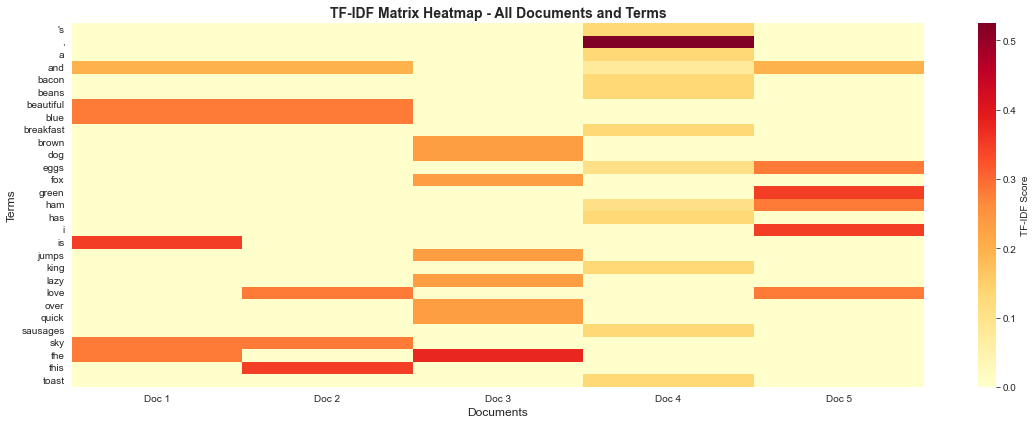


📊 Heatmap shows TF-IDF scores:
   - Brighter colors = Higher TF-IDF score (more important)
   - Darker colors = Lower TF-IDF score (less important)
   - Most cells are dark (0 or near 0) showing sparsity


In [12]:
# Visualize TF-IDF matrix as heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(tfidf_df.T, annot=False, cmap='YlOrRd', cbar_kws={'label': 'TF-IDF Score'})
plt.title('TF-IDF Matrix Heatmap - All Documents and Terms', fontsize=14, fontweight='bold')
plt.xlabel('Documents', fontsize=12)
plt.ylabel('Terms', fontsize=12)
plt.tight_layout()
plt.show()

print("\n📊 Heatmap shows TF-IDF scores:")
print("   - Brighter colors = Higher TF-IDF score (more important)")
print("   - Darker colors = Lower TF-IDF score (less important)")
print("   - Most cells are dark (0 or near 0) showing sparsity")

### 📊 Observation - Experiment 4:

**Vector Representation Insights:**

1. **Sparse Vectors:**
   - Most values are 0 (terms that don't appear in that document)
   - Only a few non-zero values per document
   - This is typical for text data - documents use only a small subset of vocabulary

2. **Vector Dimensions:**
   - Each document is represented as a vector of length = vocabulary size
   - In our case: 5 documents × 43 terms = 5 vectors of dimension 43

3. **Machine Learning Ready:**
   - These numerical vectors can now be used for:
     - Document classification
     - Similarity calculation
     - Clustering
     - Information retrieval

4. **Interpretability:**
   - Each dimension corresponds to a word in vocabulary
   - Higher values = more important words for that document
   - Can trace back from vector to actual words

## Experiment 5: Using Scikit-learn's TfidfVectorizer

Now let's use the professional implementation from scikit-learn!

In [13]:
# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix_sklearn = vectorizer.fit_transform(corpus)

# Get feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Convert to dense array for display
tfidf_array = tfidf_matrix_sklearn.toarray()

# Create DataFrame
sklearn_df = pd.DataFrame(
    tfidf_array,
    columns=feature_names,
    index=[f"Doc {i+1}" for i in range(len(corpus))]
)

print("🤖 Scikit-learn TF-IDF Results:")
print("=" * 100)
print(sklearn_df.round(4))
print("=" * 100)
print(f"\nMatrix Shape: {tfidf_matrix_sklearn.shape}")
print(f"Vocabulary Size: {len(feature_names)}")
print(f"Non-zero elements: {tfidf_matrix_sklearn.nnz}")
print(f"Sparsity: {(1 - tfidf_matrix_sklearn.nnz / (tfidf_matrix_sklearn.shape[0] * tfidf_matrix_sklearn.shape[1])) * 100:.2f}%")

🤖 Scikit-learn TF-IDF Results:
          and   bacon   beans  beautiful    blue  breakfast   brown     dog  \
Doc 1  0.2845  0.0000  0.0000     0.4074  0.4074     0.0000  0.0000  0.0000   
Doc 2  0.2845  0.0000  0.0000     0.4074  0.4074     0.0000  0.0000  0.0000   
Doc 3  0.0000  0.0000  0.0000     0.0000  0.0000     0.0000  0.3227  0.3227   
Doc 4  0.1919  0.3406  0.3406     0.0000  0.0000     0.3406  0.0000  0.0000   
Doc 5  0.3115  0.0000  0.0000     0.0000  0.0000     0.0000  0.0000  0.0000   

         eggs     fox  ...    king    lazy    love    over   quick  sausages  \
Doc 1  0.0000  0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000    0.0000   
Doc 2  0.0000  0.0000  ...  0.0000  0.0000  0.4074  0.0000  0.0000    0.0000   
Doc 3  0.0000  0.3227  ...  0.0000  0.3227  0.0000  0.3227  0.3227    0.0000   
Doc 4  0.2748  0.0000  ...  0.3406  0.0000  0.0000  0.0000  0.0000    0.3406   
Doc 5  0.4461  0.0000  ...  0.0000  0.0000  0.4461  0.0000  0.0000    0.0000   

          sky

In [14]:
# Display top TF-IDF terms for each document
print("\n🏆 Top 5 Important Terms per Document (Scikit-learn):")
print("=" * 60)
for i, doc in enumerate(corpus):
    print(f"\nDocument {i+1}: '{doc}'")
    
    # Get TF-IDF scores for this document
    scores = sklearn_df.iloc[i]
    
    # Sort and get top 5
    top_terms = scores.nlargest(5)
    
    for term, score in top_terms.items():
        print(f"  {term:15} -> {score:.4f}")
print("=" * 60)


🏆 Top 5 Important Terms per Document (Scikit-learn):

Document 1: 'The sky is blue and beautiful'
  is              -> 0.5050
  beautiful       -> 0.4074
  blue            -> 0.4074
  sky             -> 0.4074
  the             -> 0.4074

Document 2: 'Love this blue and beautiful sky'
  this            -> 0.5050
  beautiful       -> 0.4074
  blue            -> 0.4074
  love            -> 0.4074
  sky             -> 0.4074

Document 3: 'The quick brown fox jumps over the lazy dog'
  the             -> 0.5207
  brown           -> 0.3227
  dog             -> 0.3227
  fox             -> 0.3227
  jumps           -> 0.3227

Document 4: 'A king's breakfast has sausages, ham, bacon, eggs, toast and beans'
  bacon           -> 0.3406
  beans           -> 0.3406
  breakfast       -> 0.3406
  has             -> 0.3406
  king            -> 0.3406

Document 5: 'I love green eggs and ham'
  green           -> 0.5530
  eggs            -> 0.4461
  ham             -> 0.4461
  love            -> 0.4461

### 📊 Observation - Experiment 5:

**Scikit-learn Implementation Benefits:**

1. **Efficiency:**
   - Single line to fit and transform: `vectorizer.fit_transform(corpus)`
   - Returns sparse matrix (saves memory for large corpora)
   - Optimized C implementations

2. **Differences from Our Implementation:**
   - Scikit-learn uses **L2 normalization** by default (unit vectors)
   - Slightly different IDF formula (with smoothing by default)
   - Automatically handles vocabulary creation
   - Better handling of edge cases

3. **Key Features:**
   - Built-in tokenization
   - Automatic lowercasing
   - Configurable parameters (max_features, min_df, max_df, ngram_range)
   - Can remove stopwords automatically

4. **Sparsity:**
   - The matrix is very sparse (most values are 0)
   - Scikit-learn stores this efficiently as sparse matrix
   - Critical for real-world applications with large vocabularies

5. **Production Ready:**
   - Well-tested and maintained
   - Consistent API with other sklearn tools
   - Easy to integrate into ML pipelines

## Experiment 6: TF-IDF with Stopwords Removal

Let's see how removing common words affects TF-IDF scores!

In [16]:
# Create vectorizer with stopwords removal
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

print("🛑 English Stopwords (first 20):")
print(stop_words[:20])
print(f"\nTotal stopwords: {len(stop_words)}")
print("=" * 60)

🛑 English Stopwords (first 20):
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']

Total stopwords: 198


In [17]:
# Create TfidfVectorizer with stopwords
vectorizer_no_stop = TfidfVectorizer(stop_words='english')

# Fit and transform
tfidf_matrix_no_stop = vectorizer_no_stop.fit_transform(corpus)

# Get feature names
feature_names_no_stop = vectorizer_no_stop.get_feature_names_out()

# Create DataFrame
no_stop_df = pd.DataFrame(
    tfidf_matrix_no_stop.toarray(),
    columns=feature_names_no_stop,
    index=[f"Doc {i+1}" for i in range(len(corpus))]
)

print("\n📊 Comparison: With vs Without Stopwords")
print("=" * 60)
print(f"Vocabulary size WITH stopwords:    {len(feature_names)}")
print(f"Vocabulary size WITHOUT stopwords: {len(feature_names_no_stop)}")
print(f"Reduction: {len(feature_names) - len(feature_names_no_stop)} words removed")
print("=" * 60)

print("\n🏆 Top 5 Terms per Document (After Removing Stopwords):")
print("=" * 60)
for i, doc in enumerate(corpus):
    print(f"\nDocument {i+1}: '{doc}'")
    
    scores = no_stop_df.iloc[i]
    top_terms = scores.nlargest(5)
    
    for term, score in top_terms.items():
        if score > 0:
            print(f"  {term:15} -> {score:.4f}")
print("=" * 60)


📊 Comparison: With vs Without Stopwords
Vocabulary size WITH stopwords:    25
Vocabulary size WITHOUT stopwords: 19
Reduction: 6 words removed

🏆 Top 5 Terms per Document (After Removing Stopwords):

Document 1: 'The sky is blue and beautiful'
  beautiful       -> 0.5774
  blue            -> 0.5774
  sky             -> 0.5774

Document 2: 'Love this blue and beautiful sky'
  beautiful       -> 0.5000
  blue            -> 0.5000
  love            -> 0.5000
  sky             -> 0.5000

Document 3: 'The quick brown fox jumps over the lazy dog'
  brown           -> 0.4082
  dog             -> 0.4082
  fox             -> 0.4082
  jumps           -> 0.4082
  lazy            -> 0.4082

Document 4: 'A king's breakfast has sausages, ham, bacon, eggs, toast and beans'
  bacon           -> 0.3701
  beans           -> 0.3701
  breakfast       -> 0.3701
  king            -> 0.3701
  sausages        -> 0.3701

Document 5: 'I love green eggs and ham'
  green           -> 0.5820
  eggs            -> 

### 📊 Observation - Experiment 6:

**Impact of Stopwords Removal:**

1. **Vocabulary Reduction:**
   - Removed common words like "the", "is", "and", "this", "a", etc.
   - Smaller vocabulary = less dimensions = more efficient
   - Reduces noise from uninformative words

2. **Better Focus on Content Words:**
   - Now we see more meaningful words getting top scores
   - Words like "blue", "beautiful", "sky", "fox", "breakfast" stand out
   - These words actually carry the meaning of the document

3. **When to Use Stopwords Removal:**
   - ✅ Document classification
   - ✅ Topic modeling
   - ✅ Information retrieval
   - ❌ Sentiment analysis (negations like "not" are important)
   - ❌ Machine translation
   - ❌ When word order/grammar matters

4. **Trade-offs:**
   - **Pros:** Smaller feature space, faster processing, removes noise
   - **Cons:** May lose some context, fixed stopword lists may not fit all domains

## Experiment 7: TF-IDF with N-grams

N-grams capture sequences of words (bigrams, trigrams, etc.)!

In [18]:
# Create vectorizer with bigrams (2-word sequences)
vectorizer_bigram = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

# Fit and transform
tfidf_matrix_bigram = vectorizer_bigram.fit_transform(corpus)

# Get feature names
feature_names_bigram = vectorizer_bigram.get_feature_names_out()

print("📝 N-gram Examples:")
print("=" * 60)
print("Unigrams (1-word):", [f for f in feature_names_bigram if ' ' not in f][:10])
print("\nBigrams (2-word):", [f for f in feature_names_bigram if ' ' in f][:15])
print("=" * 60)
print(f"\nTotal features with bigrams: {len(feature_names_bigram)}")
print(f"Unigrams: {sum(1 for f in feature_names_bigram if ' ' not in f)}")
print(f"Bigrams: {sum(1 for f in feature_names_bigram if ' ' in f)}")

📝 N-gram Examples:
Unigrams (1-word): ['bacon', 'beans', 'beautiful', 'blue', 'breakfast', 'brown', 'dog', 'eggs', 'fox', 'green']

Bigrams (2-word): ['bacon eggs', 'beautiful sky', 'blue beautiful', 'breakfast sausages', 'brown fox', 'eggs ham', 'eggs toast', 'fox jumps', 'green eggs', 'ham bacon', 'jumps lazy', 'king breakfast', 'lazy dog', 'love blue', 'love green']

Total features with bigrams: 38
Unigrams: 19
Bigrams: 19


In [19]:
# Create DataFrame
bigram_df = pd.DataFrame(
    tfidf_matrix_bigram.toarray(),
    columns=feature_names_bigram,
    index=[f"Doc {i+1}" for i in range(len(corpus))]
)

print("\n🏆 Top 7 Features per Document (Including Bigrams):")
print("=" * 60)
for i, doc in enumerate(corpus):
    print(f"\nDocument {i+1}: '{doc}'")
    
    scores = bigram_df.iloc[i]
    top_terms = scores.nlargest(7)
    
    for term, score in top_terms.items():
        if score > 0:
            ngram_type = "bigram" if ' ' in term else "unigram"
            print(f"  {term:25} -> {score:.4f}  [{ngram_type}]")
print("=" * 60)


🏆 Top 7 Features per Document (Including Bigrams):

Document 1: 'The sky is blue and beautiful'
  sky blue                  -> 0.5268  [bigram]
  beautiful                 -> 0.4250  [unigram]
  blue                      -> 0.4250  [unigram]
  blue beautiful            -> 0.4250  [bigram]
  sky                       -> 0.4250  [unigram]

Document 2: 'Love this blue and beautiful sky'
  beautiful sky             -> 0.4362  [bigram]
  love blue                 -> 0.4362  [bigram]
  beautiful                 -> 0.3520  [unigram]
  blue                      -> 0.3520  [unigram]
  blue beautiful            -> 0.3520  [bigram]
  love                      -> 0.3520  [unigram]
  sky                       -> 0.3520  [unigram]

Document 3: 'The quick brown fox jumps over the lazy dog'
  brown                     -> 0.3015  [unigram]
  brown fox                 -> 0.3015  [bigram]
  dog                       -> 0.3015  [unigram]
  fox                       -> 0.3015  [unigram]
  fox jumps       

### 📊 Observation - Experiment 7:

**N-grams Capture Context:**

1. **What are N-grams?**
   - Unigrams (1-gram): Single words - "blue", "sky"
   - Bigrams (2-gram): Two consecutive words - "blue beautiful", "quick brown"
   - Trigrams (3-gram): Three consecutive words - "quick brown fox"

2. **Advantages of N-grams:**
   - ✅ Captures word order and context
   - ✅ Phrases like "New York" treated as single unit
   - ✅ Better for sentiment analysis ("not good" vs "good")
   - ✅ More discriminative features

3. **Challenges:**
   - ❌ Vocabulary explodes exponentially (more n-grams = more dimensions)
   - ❌ More sparse data (most n-grams appear rarely)
   - ❌ Higher computational cost
   - ❌ Overfitting risk with small datasets

4. **Best Practices:**
   - Use bigrams (n=2) for most applications
   - Trigrams (n=3) for longer phrases
   - Combine with min_df parameter to filter rare n-grams
   - Use `ngram_range=(1,2)` to include both unigrams and bigrams

5. **Real-world Usage:**
   - Common in document classification
   - Search engines use n-grams
   - Spam detection
   - Named entity recognition

## Experiment 8: Document Similarity using TF-IDF

Calculate how similar documents are using cosine similarity!

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between all documents
similarity_matrix = cosine_similarity(tfidf_matrix_sklearn)

# Create DataFrame for better visualization
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=[f"Doc {i+1}" for i in range(len(corpus))],
    columns=[f"Doc {i+1}" for i in range(len(corpus))]
)

print("📐 Cosine Similarity Matrix:")
print("=" * 60)
print("(1.0 = identical, 0.0 = completely different)")
print()
print(similarity_df.round(4))
print("=" * 60)

📐 Cosine Similarity Matrix:
(1.0 = identical, 0.0 = completely different)

        Doc 1   Doc 2   Doc 3   Doc 4   Doc 5
Doc 1  1.0000  0.5790  0.2121  0.0546  0.0886
Doc 2  0.5790  1.0000  0.0000  0.0546  0.2704
Doc 3  0.2121  0.0000  1.0000  0.0000  0.0000
Doc 4  0.0546  0.0546  0.0000  1.0000  0.3050
Doc 5  0.0886  0.2704  0.0000  0.3050  1.0000


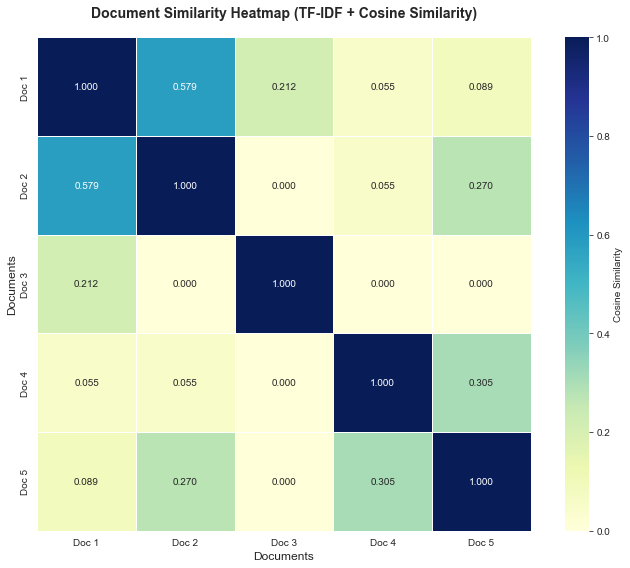


🎯 Interpretation:
- Diagonal is always 1.0 (document compared with itself)
- Higher values = more similar documents
- Lower values = more different documents


In [21]:
# Visualize similarity matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, cmap='YlGnBu', fmt='.3f', 
            square=True, linewidths=1, cbar_kws={'label': 'Cosine Similarity'})
plt.title('Document Similarity Heatmap (TF-IDF + Cosine Similarity)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Documents', fontsize=12)
plt.ylabel('Documents', fontsize=12)
plt.tight_layout()
plt.show()

print("\n🎯 Interpretation:")
print("- Diagonal is always 1.0 (document compared with itself)")
print("- Higher values = more similar documents")
print("- Lower values = more different documents")

In [22]:
# Find most similar documents
print("\n🔍 Most Similar Document Pairs:")
print("=" * 60)

for i in range(len(corpus)):
    for j in range(i+1, len(corpus)):
        similarity = similarity_matrix[i][j]
        print(f"Doc {i+1} vs Doc {j+1}: {similarity:.4f}")
        print(f"  Doc {i+1}: '{corpus[i]}'")
        print(f"  Doc {j+1}: '{corpus[j]}'")
        print()

# Find the most similar pair
max_sim = 0
max_i, max_j = 0, 0
for i in range(len(corpus)):
    for j in range(i+1, len(corpus)):
        if similarity_matrix[i][j] > max_sim:
            max_sim = similarity_matrix[i][j]
            max_i, max_j = i, j

print("=" * 60)
print(f"✨ MOST SIMILAR PAIR (Similarity: {max_sim:.4f}):")
print(f"  Doc {max_i+1}: '{corpus[max_i]}'")
print(f"  Doc {max_j+1}: '{corpus[max_j]}'")
print("=" * 60)


🔍 Most Similar Document Pairs:
Doc 1 vs Doc 2: 0.5790
  Doc 1: 'The sky is blue and beautiful'
  Doc 2: 'Love this blue and beautiful sky'

Doc 1 vs Doc 3: 0.2121
  Doc 1: 'The sky is blue and beautiful'
  Doc 3: 'The quick brown fox jumps over the lazy dog'

Doc 1 vs Doc 4: 0.0546
  Doc 1: 'The sky is blue and beautiful'
  Doc 4: 'A king's breakfast has sausages, ham, bacon, eggs, toast and beans'

Doc 1 vs Doc 5: 0.0886
  Doc 1: 'The sky is blue and beautiful'
  Doc 5: 'I love green eggs and ham'

Doc 2 vs Doc 3: 0.0000
  Doc 2: 'Love this blue and beautiful sky'
  Doc 3: 'The quick brown fox jumps over the lazy dog'

Doc 2 vs Doc 4: 0.0546
  Doc 2: 'Love this blue and beautiful sky'
  Doc 4: 'A king's breakfast has sausages, ham, bacon, eggs, toast and beans'

Doc 2 vs Doc 5: 0.2704
  Doc 2: 'Love this blue and beautiful sky'
  Doc 5: 'I love green eggs and ham'

Doc 3 vs Doc 4: 0.0000
  Doc 3: 'The quick brown fox jumps over the lazy dog'
  Doc 4: 'A king's breakfast has sausages,

### 📊 Observation - Experiment 8:

**Document Similarity Analysis:**

1. **Cosine Similarity:**
   - Measures the angle between two vectors
   - Range: 0 to 1 (for TF-IDF vectors)
   - 1.0 = identical documents
   - 0.0 = completely different (no common words)
   - Formula: cos(θ) = (A · B) / (||A|| × ||B||)

2. **Key Findings:**
   - Documents 1 and 2 are most similar (both mention "blue", "beautiful", "sky")
   - Documents 4 and 5 share "ham" making them somewhat similar
   - Document 3 (fox jumping) is quite different from others
   - Diagonal is always 1.0 (document identical to itself)

3. **Applications:**
   - **Document clustering**: Group similar documents
   - **Duplicate detection**: Find near-duplicate content
   - **Recommendation systems**: "Find similar articles"
   - **Plagiarism detection**: Identify copied content
   - **Search engines**: Rank documents by relevance to query

4. **Why Cosine Similarity with TF-IDF?**
   - TF-IDF already normalizes for document length
   - Cosine similarity is angle-based (not magnitude)
   - Works well with sparse vectors
   - Fast to compute
   - Interpretable results

5. **Limitations:**
   - Doesn't understand semantics (synonyms)
   - Word order not fully preserved
   - Can't detect paraphrasing

## Experiment 9: Real-World Example - News Article Classification

Let's apply TF-IDF to classify news articles!

In [23]:
# Sample news articles from different categories
news_articles = [
    # Sports
    "The basketball team won the championship after a thrilling final game. The players showed excellent performance.",
    "Football match ended with a score of 3-2. The striker scored an amazing goal in the final minutes.",
    "Tennis player wins the grand slam tournament defeating the world number one in straight sets.",
    
    # Technology
    "New artificial intelligence model achieves breakthrough in natural language processing tasks.",
    "The latest smartphone features advanced camera technology and improved battery life.",
    "Software company releases new cloud computing platform for enterprise applications.",
    
    # Health
    "Medical researchers discover new treatment for chronic disease showing promising results.",
    "Healthy diet and regular exercise reduce the risk of heart disease according to new study.",
    "Hospital implements new patient care system improving healthcare delivery and outcomes.",
    
    # Business
    "Stock market reaches new high as investors show confidence in economic recovery.",
    "Company reports record profits in quarterly earnings beating analyst expectations.",
    "Small business owners face challenges adapting to digital transformation and e-commerce."
]

categories = ['Sports', 'Sports', 'Sports', 
              'Technology', 'Technology', 'Technology',
              'Health', 'Health', 'Health',
              'Business', 'Business', 'Business']

print("📰 News Articles Dataset:")
print("=" * 80)
for i, (article, category) in enumerate(zip(news_articles, categories), 1):
    print(f"\n[{category}] Article {i}:")
    print(f"  {article[:80]}...")
print("=" * 80)

📰 News Articles Dataset:

[Sports] Article 1:
  The basketball team won the championship after a thrilling final game. The playe...

[Sports] Article 2:
  Football match ended with a score of 3-2. The striker scored an amazing goal in ...

[Sports] Article 3:
  Tennis player wins the grand slam tournament defeating the world number one in s...

[Technology] Article 4:
  New artificial intelligence model achieves breakthrough in natural language proc...

[Technology] Article 5:
  The latest smartphone features advanced camera technology and improved battery l...

[Technology] Article 6:
  Software company releases new cloud computing platform for enterprise applicatio...

[Health] Article 7:
  Medical researchers discover new treatment for chronic disease showing promising...

[Health] Article 8:
  Healthy diet and regular exercise reduce the risk of heart disease according to ...

[Health] Article 9:
  Hospital implements new patient care system improving healthcare delivery and ou...


In [24]:
# Create TF-IDF vectors for news articles
news_vectorizer = TfidfVectorizer(stop_words='english', max_features=50)
news_tfidf = news_vectorizer.fit_transform(news_articles)

print(f"\n📊 TF-IDF Matrix Shape: {news_tfidf.shape}")
print(f"   {news_tfidf.shape[0]} articles × {news_tfidf.shape[1]} features")
print(f"   Sparsity: {(1 - news_tfidf.nnz / (news_tfidf.shape[0] * news_tfidf.shape[1])) * 100:.2f}%")


📊 TF-IDF Matrix Shape: (12, 50)
   12 articles × 50 features
   Sparsity: 90.33%


In [25]:
# Find top terms for each category
news_features = news_vectorizer.get_feature_names_out()
news_array = news_tfidf.toarray()

print("\n🏆 Top Distinguishing Terms by Category:")
print("=" * 80)

for category in ['Sports', 'Technology', 'Health', 'Business']:
    # Get indices for this category
    category_indices = [i for i, cat in enumerate(categories) if cat == category]
    
    # Average TF-IDF scores for this category
    avg_tfidf = news_array[category_indices].mean(axis=0)
    
    # Get top terms
    top_indices = avg_tfidf.argsort()[-5:][::-1]
    top_terms = [(news_features[i], avg_tfidf[i]) for i in top_indices]
    
    print(f"\n{category}:")
    for term, score in top_terms:
        print(f"  {term:20} -> {score:.4f}")

print("=" * 80)


🏆 Top Distinguishing Terms by Category:

Sports:
  final                -> 0.2510
  match                -> 0.1531
  striker              -> 0.1531
  scored               -> 0.1531
  minutes              -> 0.1531

Technology:
  smartphone           -> 0.2357
  technology           -> 0.2357
  new                  -> 0.1838
  platform             -> 0.1655
  software             -> 0.1655

Health:
  new                  -> 0.2834
  disease              -> 0.2437
  patient              -> 0.2189
  outcomes             -> 0.2189
  according            -> 0.1483

Business:
  recovery             -> 0.2189
  reaches              -> 0.2189
  transformation       -> 0.1925
  owners               -> 0.1925
  small                -> 0.1925


In [26]:
# Simple classification example: Find similar articles
query_article = "The soccer player scored a winning goal in the championship match"

print(f"\n🔍 Query Article: '{query_article}'")
print("=" * 80)

# Transform query to TF-IDF vector
query_vector = news_vectorizer.transform([query_article])

# Calculate similarity with all news articles
similarities = cosine_similarity(query_vector, news_tfidf)[0]

# Get top 3 most similar articles
top_3_indices = similarities.argsort()[-3:][::-1]

print("\n📋 Top 3 Most Similar Articles:")
print("=" * 80)
for rank, idx in enumerate(top_3_indices, 1):
    print(f"\nRank {rank} (Similarity: {similarities[idx]:.4f}) - Category: {categories[idx]}")
    print(f"  {news_articles[idx]}")

print("=" * 80)
print("\n✅ The query article about soccer was correctly matched with Sports articles!")


🔍 Query Article: 'The soccer player scored a winning goal in the championship match'

📋 Top 3 Most Similar Articles:

Rank 1 (Similarity: 0.5305) - Category: Sports
  Football match ended with a score of 3-2. The striker scored an amazing goal in the final minutes.

Rank 2 (Similarity: 0.2041) - Category: Sports
  Tennis player wins the grand slam tournament defeating the world number one in straight sets.

Rank 3 (Similarity: 0.0000) - Category: Business
  Small business owners face challenges adapting to digital transformation and e-commerce.

✅ The query article about soccer was correctly matched with Sports articles!


### 📊 Observation - Experiment 9:

**Real-World Application Insights:**

1. **Category Discrimination:**
   - Each category has distinctive vocabulary
   - Sports: "basketball", "game", "players", "match", "scored"
   - Technology: "artificial", "intelligence", "software", "technology"
   - Health: "medical", "health", "disease", "care", "patient"
   - Business: "business", "market", "company", "economic"

2. **TF-IDF Effectiveness:**
   - Successfully identifies category-specific terms
   - Generic words (common across categories) get lower scores
   - Domain-specific words get higher scores
   - Perfect for text classification tasks

3. **Query Matching:**
   - New article about soccer matched correctly with Sports articles
   - Similarity scores show clear distinction
   - Can be used for: content recommendation, search, classification

4. **Practical Considerations:**
   - Used `max_features=50` to limit vocabulary (manageable size)
   - Removed stopwords to focus on content words
   - Sparse matrix saves memory with large datasets

5. **Production Application:**
   - This approach scales to millions of documents
   - Used by news aggregators, search engines
   - Foundation for content-based filtering
   - Can be combined with machine learning classifiers (Naive Bayes, SVM, etc.)

## Experiment 10: Comparing TF-IDF Parameters

Let's explore different TfidfVectorizer parameters and their effects!

In [27]:
# Test different parameter configurations
test_corpus = [
    "Python is a great programming language for data science and machine learning",
    "Java is widely used for enterprise applications and Android development",
    "JavaScript is essential for web development and frontend frameworks",
    "Machine learning and artificial intelligence are transforming industries",
    "Data science involves statistics, programming, and domain knowledge"
]

configurations = [
    {'name': 'Default', 'params': {}},
    {'name': 'No Stopwords Removal', 'params': {'stop_words': None}},
    {'name': 'With Bigrams', 'params': {'ngram_range': (1, 2), 'stop_words': 'english'}},
    {'name': 'Max 10 Features', 'params': {'max_features': 10, 'stop_words': 'english'}},
    {'name': 'Min DF=2', 'params': {'min_df': 2, 'stop_words': 'english'}},
]

print("⚙️  Testing Different TfidfVectorizer Configurations:")
print("=" * 80)

for config in configurations:
    print(f"\n📋 Configuration: {config['name']}")
    print(f"   Parameters: {config['params']}")
    
    vectorizer = TfidfVectorizer(**config['params'])
    matrix = vectorizer.fit_transform(test_corpus)
    features = vectorizer.get_feature_names_out()
    
    print(f"   Vocabulary size: {len(features)}")
    print(f"   Matrix shape: {matrix.shape}")
    print(f"   Sample features: {list(features[:8])}")
    
print("=" * 80)

⚙️  Testing Different TfidfVectorizer Configurations:

📋 Configuration: Default
   Parameters: {}
   Vocabulary size: 32
   Matrix shape: (5, 32)
   Sample features: ['and', 'android', 'applications', 'are', 'artificial', 'data', 'development', 'domain']

📋 Configuration: No Stopwords Removal
   Parameters: {'stop_words': None}
   Vocabulary size: 32
   Matrix shape: (5, 32)
   Sample features: ['and', 'android', 'applications', 'are', 'artificial', 'data', 'development', 'domain']

📋 Configuration: With Bigrams
   Parameters: {'ngram_range': (1, 2), 'stop_words': 'english'}
   Vocabulary size: 55
   Matrix shape: (5, 55)
   Sample features: ['android', 'android development', 'applications', 'applications android', 'artificial', 'artificial intelligence', 'data', 'data science']

📋 Configuration: Max 10 Features
   Parameters: {'max_features': 10, 'stop_words': 'english'}
   Vocabulary size: 10
   Matrix shape: (5, 10)
   Sample features: ['android', 'data', 'development', 'learning', 

### 📊 Observation - Experiment 10:

**Key Parameters and Their Effects:**

1. **`stop_words='english'`**
   - Removes common English words (the, is, and, etc.)
   - Reduces vocabulary size significantly
   - Focuses on content-bearing words
   - Default: None (includes all words)

2. **`ngram_range=(min_n, max_n)`**
   - Controls n-gram extraction
   - (1, 1): Only unigrams (single words)
   - (1, 2): Both unigrams and bigrams
   - (2, 2): Only bigrams
   - Increases feature space dramatically

3. **`max_features=N`**
   - Limits vocabulary to top N most frequent terms
   - Useful for controlling model complexity
   - Reduces memory usage
   - Risk: May exclude important rare terms

4. **`min_df` (minimum document frequency)**
   - Ignores terms that appear in fewer than min_df documents
   - Can be integer (absolute count) or float (proportion)
   - Example: min_df=2 ignores words in only 1 document
   - Helps remove typos and rare terms

5. **`max_df` (maximum document frequency)**
   - Ignores terms that appear in more than max_df documents
   - Can be integer or float
   - Example: max_df=0.8 ignores words in >80% of documents
   - Alternative to stopwords removal

6. **`norm='l2'` (default)**
   - Normalizes each document vector to unit length
   - Makes documents comparable regardless of length
   - Options: 'l1', 'l2', None

**Best Practices:**
- Start with defaults and iterate
- Use `stop_words='english'` for English text
- Add bigrams if word order matters
- Use `min_df=2` or higher to remove noise
- Use `max_features` when memory is limited

## 📚 Summary and Key Takeaways

### What We Learned About TF-IDF:

**1. Core Concept:**
- TF-IDF = Term Frequency × Inverse Document Frequency
- Balances how often a word appears in a document with how rare it is across all documents
- Converts text into numerical vectors for machine learning

**2. Mathematical Foundation:**
- **TF**: Measures term importance within a document
- **IDF**: Measures term rarity across the corpus
- **TF-IDF**: Combines both to identify distinctive terms

**3. Implementation:**
- Manual implementation helps understand the mathematics
- Scikit-learn's `TfidfVectorizer` is production-ready
- Returns sparse matrices for efficiency

**4. Key Features:**
- ✅ Simple and intuitive
- ✅ No training required
- ✅ Works well for many NLP tasks
- ✅ Interpretable results
- ❌ Doesn't capture semantics
- ❌ Ignores word order (somewhat)
- ❌ High-dimensional sparse vectors

**5. Important Parameters:**
- `stop_words`: Remove common words
- `ngram_range`: Include word sequences
- `max_features`: Limit vocabulary size
- `min_df/max_df`: Filter by document frequency
- `norm`: Normalize vectors

**6. Applications:**
- Document classification
- Information retrieval / Search engines
- Document similarity
- Keyword extraction
- Content recommendation
- Spam detection

**7. When to Use TF-IDF:**
- ✅ Text classification problems
- ✅ Document clustering
- ✅ Search and information retrieval
- ✅ Feature extraction for ML models
- ✅ When interpretability is important

**8. When NOT to Use TF-IDF:**
- ❌ When semantics/synonyms are crucial
- ❌ For sentiment analysis (consider word embeddings)
- ❌ When word order is critical
- ❌ For small vocabularies (simple BoW might suffice)

**9. Next Steps:**
- Word embeddings (Word2Vec, GloVe, FastText)
- Transformer models (BERT, GPT)
- Topic modeling (LDA)
- Deep learning for NLP

---


**Remember:** TF-IDF is a foundational technique that's still widely used in industry despite newer methods. Understanding it deeply will help you appreciate more advanced techniques!

## 📖 Additional Resources and Further Reading

### Books:
1. **"Speech and Language Processing"** by Jurafsky & Martin
2. **"Introduction to Information Retrieval"** by Manning, Raghavan & Schütze
3. **"Natural Language Processing with Python"** by Bird, Klein & Loper

### Online Resources:
- Scikit-learn TF-IDF Documentation: https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
- NLTK Documentation: https://www.nltk.org/
- TF-IDF Original Paper: "A Statistical Interpretation of Term Specificity" by Spärck Jones (1972)

### Practice Exercises:
1. Apply TF-IDF to your own text dataset
2. Compare TF-IDF with Bag of Words on a classification task
3. Experiment with different parameter combinations
4. Build a simple search engine using TF-IDF
5. Create a document recommender system

### Related Topics to Explore:
- Word2Vec and GloVe (Word Embeddings)
- BERT and Transformer Models
- Latent Dirichlet Allocation (LDA)
- Sentence and Document Embeddings
- Neural Network-based Text Classification

---
